In [45]:
# import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

In [47]:
train = pd.read_excel('lendingclub_traindata.xlsx')
validation=pd.read_excel('lendingclub_valdata.xlsx')
test = pd.read_excel('lendingclub_testdata.xlsx')

# 1 = good, 0 = default

#give column names
cols = ['home_ownership', 'income', 'dti', 'fico','int_rate','total_acc','loan_status']
train.columns = validation.columns=test.columns = cols

print("Training set")
print(train.head())
print("Validation set")
print (validation.head())
print("Test set")
print(test.head())

Training set
   home_ownership    income    dti  fico  int_rate  total_acc  loan_status
0               1   44304.0  18.47   690     17.93         20            0
1               0   50000.0  29.62   735     11.99         44            1
2               0   64400.0  16.68   675     13.67         20            1
3               0   38500.0  33.73   660     30.74         17            0
4               1  118000.0  26.66   665     12.79         47            1
Validation set
   home_ownership    income    dti  fico  int_rate  total_acc  loan_status
0               0   25000.0  27.60   660     17.27         20            0
1               0   50000.0  21.51   715      8.90         23            1
2               1  100000.0   8.14   770      7.90         19            1
3               0   75000.0   1.76   685     17.57         13            0
4               1   78000.0  16.11   680      6.89         33            1
Test set
   home_ownership    income    dti  fico  int_rate  total_acc  

In [48]:
# print summary statistics for train data
print("\nSummary statistics\n", train.describe())
print("\nCorrelation matrix\n", train.corr())


Summary statistics
        home_ownership        income          dti       fico     int_rate  \
count     7000.000000  7.000000e+03  7000.000000  7000.0000  7000.000000   
mean         0.604000  7.452444e+04    17.997951   695.1650    13.538831   
std          0.489099  5.433061e+04     8.889530    31.5515     4.662279   
min          0.000000  0.000000e+00     0.000000   660.0000     5.320000   
25%          0.000000  4.500000e+04    11.767500   670.0000    10.150000   
50%          1.000000  6.372500e+04    17.440000   685.0000    13.110000   
75%          1.000000  9.000000e+04    23.730000   710.0000    16.290000   
max          1.000000  1.500000e+06   244.600000   845.0000    30.990000   

         total_acc  loan_status  
count  7000.000000  7000.000000  
mean     25.290571     0.791714  
std      11.888844     0.406111  
min       2.000000     0.000000  
25%      17.000000     1.000000  
50%      24.000000     1.000000  
75%      32.000000     1.000000  
max     120.000000    

In [49]:
# remove target column to create feature only dataset
X_train= np.array( train.drop(['loan_status'],axis= 1))
X_val=np.array( validation.drop(['loan_status'],axis= 1))
X_test = np.array( test.drop(['loan_status'],axis= 1))


# Scale data using the mean and standard deviation of the training set.
# This is not necessary for the simple logistic regression we will do here
# but should be done if L1 or L2 regrularization is carried out
X_test=(X_test-X_train.mean())/X_train.std()
X_val=(X_val-X_train.mean())/X_train.std()
X_train=(X_train-X_train.mean())/X_train.std()

# store target column as y-variables
y_train = train['loan_status']
y_val=validation['loan_status']
y_test = test['loan_status']


#print first five instances for each data set - scaled
print("Scaled data")
print("Training set")
print("Validation set")
print("Test set")

print(X_train.shape, y_train.shape, X_val.shape,y_val.shape, X_test.shape, y_test.shape)

Scaled data
Training set
Validation set
Test set
(7000, 6) (7000,) (3000, 6) (3000,) (2290, 6) (2290,)


In [50]:
freq = y_train.value_counts()           # count frequency of different classes in training swet
freq/sum(freq)*100                      # get percentage of above

loan_status
1    79.171429
0    20.828571
Name: count, dtype: float64

In [51]:
#Create an instance of logistic regression named lgstc_reg on scaled data

lgstc_reg =  LogisticRegression(penalty="none",solver="newton-cg")

# Fit logististic regression to training set

lgstc_reg.fit(X_train, y_train)                                        # fit training data on logistic regression


print(lgstc_reg.intercept_, lgstc_reg.coef_)                           # get the coefficients of each features

[1732.41031092] [[ 9.30445267e+03  1.89582972e-02 -1.04288395e+03  1.88914401e+02
  -3.61314994e+03  6.61537054e+01]]


In [52]:
# y_train_pred, y_val_pred, and y_test_pred are the predicted probabilities for the training set
# validation set and test set using the fitted logistic regression model

y_train_pred=lgstc_reg.predict_proba(X_train)
y_val_pred=lgstc_reg.predict_proba(X_val)
y_test_pred=lgstc_reg.predict_proba(X_test)

# Calculate maximum likelihood for training set, validation set, and test set

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0])) # if y_train == 1 set y_train_pred[:,1] otherwise set y_train_pred[:,0]
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

# Calculate cost functions from maximum likelihoods

cost_function_training=np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val=np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test=np.negative(np.sum(mle_vector_test)/len(y_test))

print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)

cost function training set = 0.4758590927020228
cost function validation set = 0.470280574630869
cost function test set = 0.4675879900518901


In [53]:
THRESHOLD = [0.00, .75, .80, .85 , 1.00]
# Create dataframe to store results
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD

j = 0

# Iterate over the 3 thresholds

for i in THRESHOLD:


    #lgstc_reg.fit(X_train, y_train)


    # If prob for test set > threshold predict 1
    preds = np.where(lgstc_reg.predict_proba(X_test)[:,1] > i, 1, 0)


    # create confusion matrix
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100                   # confusion matrix (in percentage)

    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')

    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives

    results.iloc[j,1] = accuracy_score(y_test, preds)
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)


    j += 1

print('ALL METRICS')
print( results.T)

Confusion matrix for threshold = 0.0
[[79.17030568  0.        ]
 [20.82969432  0.        ]]
 
Confusion matrix for threshold = 0.75
[[60.87336245 18.29694323]
 [10.26200873 10.56768559]]
 
Confusion matrix for threshold = 0.8
[[49.38864629 29.78165939]
 [ 6.68122271 14.14847162]]
 
Confusion matrix for threshold = 0.85
[[32.31441048 46.8558952 ]
 [ 3.40611354 17.42358079]]
 
Confusion matrix for threshold = 1.0
[[ 0.         79.17030568]
 [ 0.         20.82969432]]
 
ALL METRICS
                       0         1         2         3         4
THRESHOLD            0.0      0.75       0.8      0.85       1.0
accuracy        0.791703   0.71441  0.635371   0.49738  0.208297
true pos rate        1.0  0.768891  0.623828  0.408163       0.0
true neg rate        0.0  0.507338  0.679245  0.836478       1.0
false pos rate       1.0  0.492662  0.320755  0.163522       0.0
precision       0.791703   0.85574  0.880841  0.904645       0.0
f-score         0.883744  0.809994  0.730384  0.562524       

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.7029640345004226


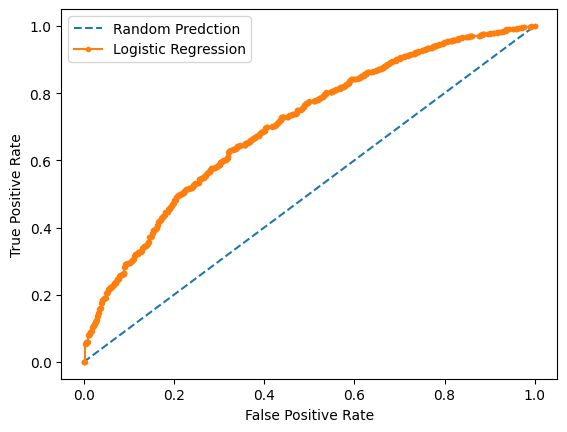

In [54]:

# Calculate the receiver operating curve and the AUC measure

lr_prob=lgstc_reg.predict_proba(X_test)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()